In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
df=pd.read_csv('C:/Users/Administrateur/projet file rouge/data/DATASET IQACombiné.csv',encoding='unicode_escape')
# Reading the dataset

In [6]:
df.head()
# Loading the dataset

,Date de dÃ©but,Date de fin,Organisme,Zas,code site,nom site,type d'implantation,type d'influence,NO2,O3,PM10,PM2.5,SO2,DATES
0,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,ZAG CLERMONT-FERRAND,FR07004,Montferrand,Urbaine,Fond,6.1,47.8,6.7,6.1,NaN,2021-01-01
1,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,ZAG CLERMONT-FERRAND,FR07009,Jardin Lecoq,Urbaine,Fond,7.5,46.8,5.2,NaN,NaN,2021-01-01
2,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,ZAG CLERMONT-FERRAND,FR07034,Clermont-Esplanade Gare,Urbaine,Trafic,9.1,NaN,5.3,3.7,NaN,2021-01-01
3,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,ZAG CLERMONT-FERRAND,FR07039,ChamaliÃ¨res Europe,Urbaine,Trafic,8.2,NaN,8.8,NaN,NaN,2021-01-01
4,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,ZAG CLERMONT-FERRAND,FR07051,Beaulieu,PÃ©riurbaine,Industrielle,NaN,NaN,5.3,NaN,NaN,2021-01-01


In [9]:
df.shape

(2330215, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330215 entries, 0 to 2330214
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date de dÃ©but       object 
 1   Date de fin          object 
 2   Organisme            object 
 3   Zas                  object 
 4   code site            object 
 5   nom site             object 
 6   type d'implantation  object 
 7   type d'influence     object 
 8   NO2                  float64
 9   O3                   float64
 10  PM10                 float64
 11  PM2.5                float64
 12  SO2                  float64
 13  DATES                object 
dtypes: float64(5), object(9)
memory usage: 248.9+ MB


In [11]:
df.isnull().sum()

Date de dÃ©but               0
Date de fin                  0
Organisme                    0
Zas                       6671
code site                    0
nom site                     0
type d'implantation          0
type d'influence             0
NO2                     387873
O3                      753875
PM10                    499919
PM2.5                  1383922
SO2                    2166138
DATES                        0
dtype: int64

In [12]:
df.describe()

,NO2,O3,PM10,PM2.5,SO2
count,1.942342e+06,1.576340e+06,1.830296e+06,946293.000000,164077.000000
mean,1.648088e+01,5.289980e+01,1.529098e+01,9.446872,2.980864
std,1.565905e+01,3.077163e+01,1.278386e+01,8.643166,10.169816
min,-3.800000e+00,-4.000000e+00,-3.900000e+00,-3.000000,-5.300000
25%,5.300000e+00,2.880000e+01,7.300000e+00,4.000000,0.000000
50%,1.130000e+01,5.330000e+01,1.230000e+01,7.000000,1.200000
75%,2.290000e+01,7.470000e+01,1.950000e+01,11.800000,2.900000
max,2.024000e+02,2.807000e+02,9.723000e+02,305.300000,855.200000


In [13]:
df.nunique()
# These are all the unique values present in the dataframe

Date de dÃ©but         35362
Date de fin            35362
Organisme                  1
Zas                       12
code site                 85
nom site                  85
type d'implantation        5
type d'influence           3
NO2                     1471
O3                      1847
PM10                    2118
PM2.5                   1099
SO2                     1121
DATES                   2267
dtype: int64

In [23]:
df.columns

Index(['date_debut', 'date_fin', 'Organisme', 'Zas', 'code_site', 'nom_site',
       'type_implentation', 'type_influence', 'NO2', 'O3', 'PM10', 'PM2.5',
       'SO2', 'DATES'],
      dtype='object')

In [22]:
df.rename(columns={'Date de dÃ©but': 'date_debut', 'Date de fin': 'date_fin','code site':'code_site','nom site':'nom_site','type d\'implantation':'type_implentation','type d\'influence':'type_influence'}, inplace=True)

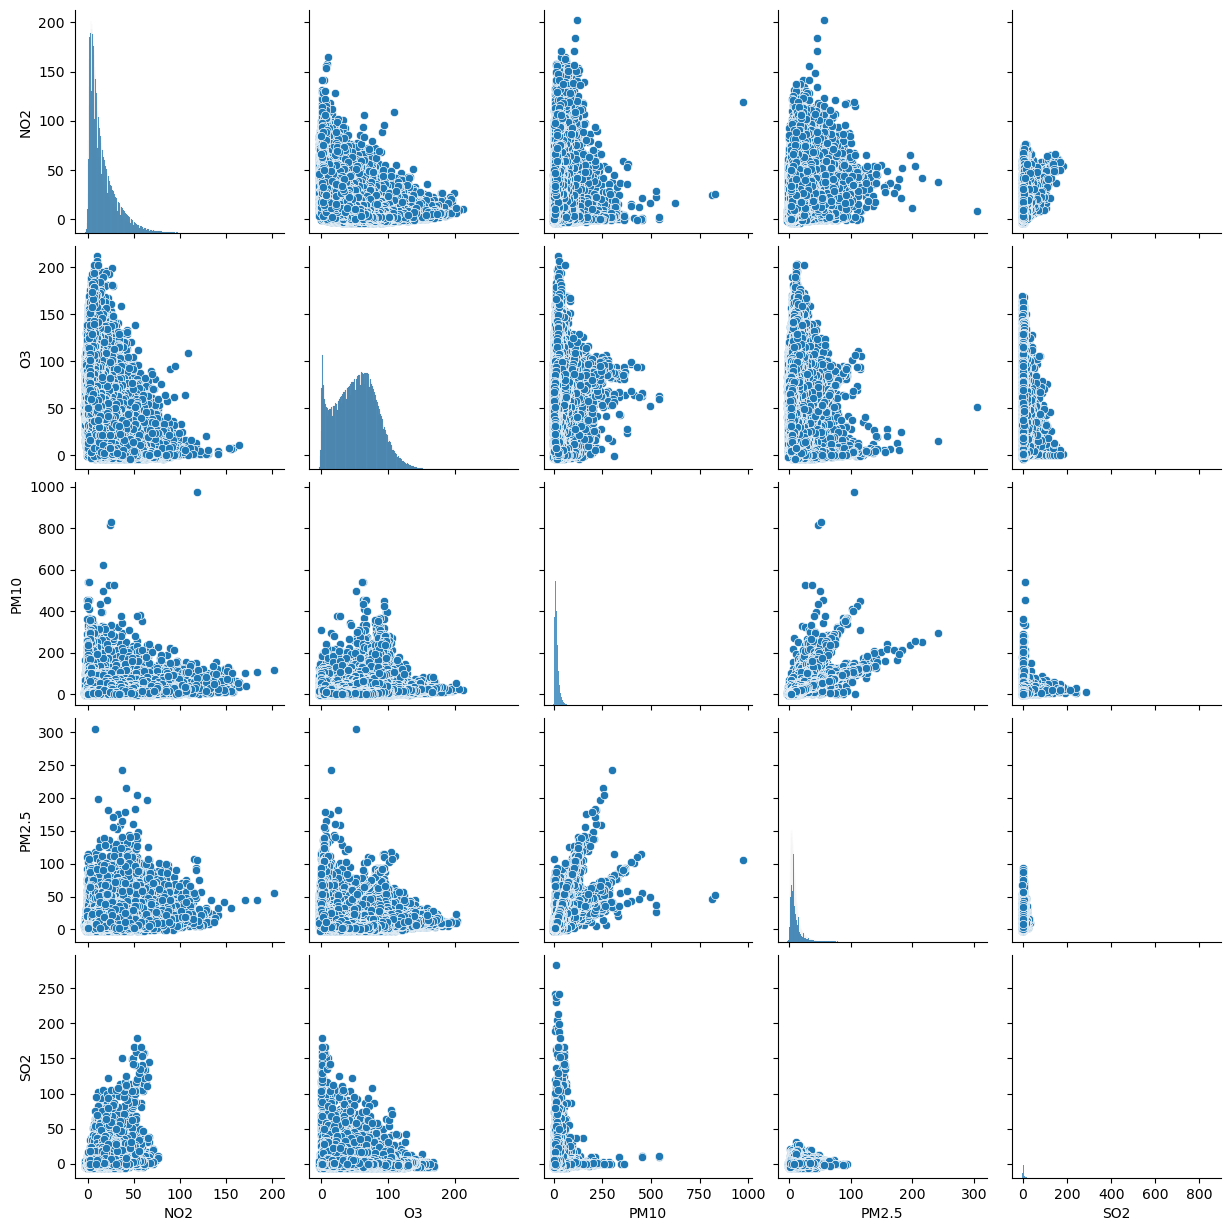

In [7]:
sns.pairplot(data=df)

In [8]:
df['nom site'].value_counts()

nom site
ROCHES DE CONDRIEU       61815
SAINT EXUPERY            33044
PASTEUR                  32907
Moulins Centre           32296
Beaulieu                 32126
                         ...  
Villeneuve sur Allier     1023
ST ETIENNE BD URBAIN       853
A7 Nord-IsÃ¨re             722
GENAS                      156
Riom                         2
Name: count, Length: 85, dtype: int64

[]

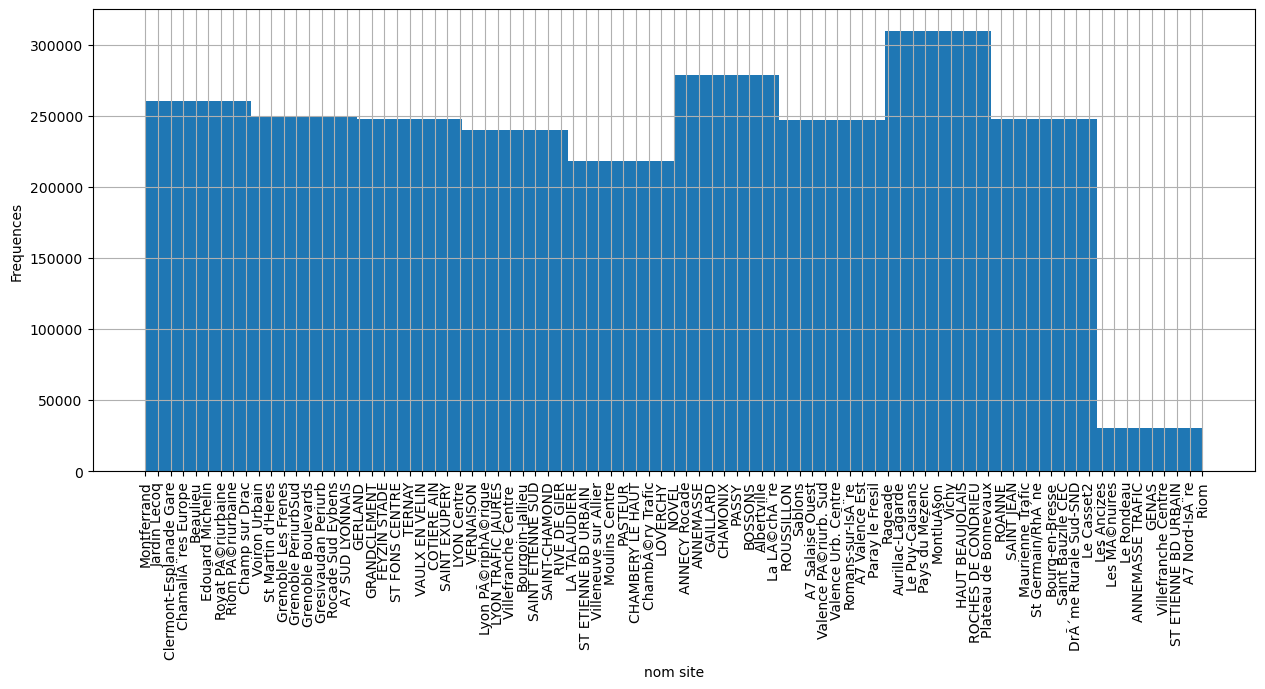

In [24]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.nom_site.hist()
plt.xlabel('nom site')
plt.ylabel('Frequences')
plt.plot()

In [25]:
df['type_implentation'].value_counts()
# Viewing the count of values present in the type column

type_implentation
Urbaine                    1326402
PÃ©riurbaine                689000
Rurale rÃ©gionale           128500
Rurale prÃ¨s des villes     123159
Rurale nationale             63154
Name: count, dtype: int64

[]

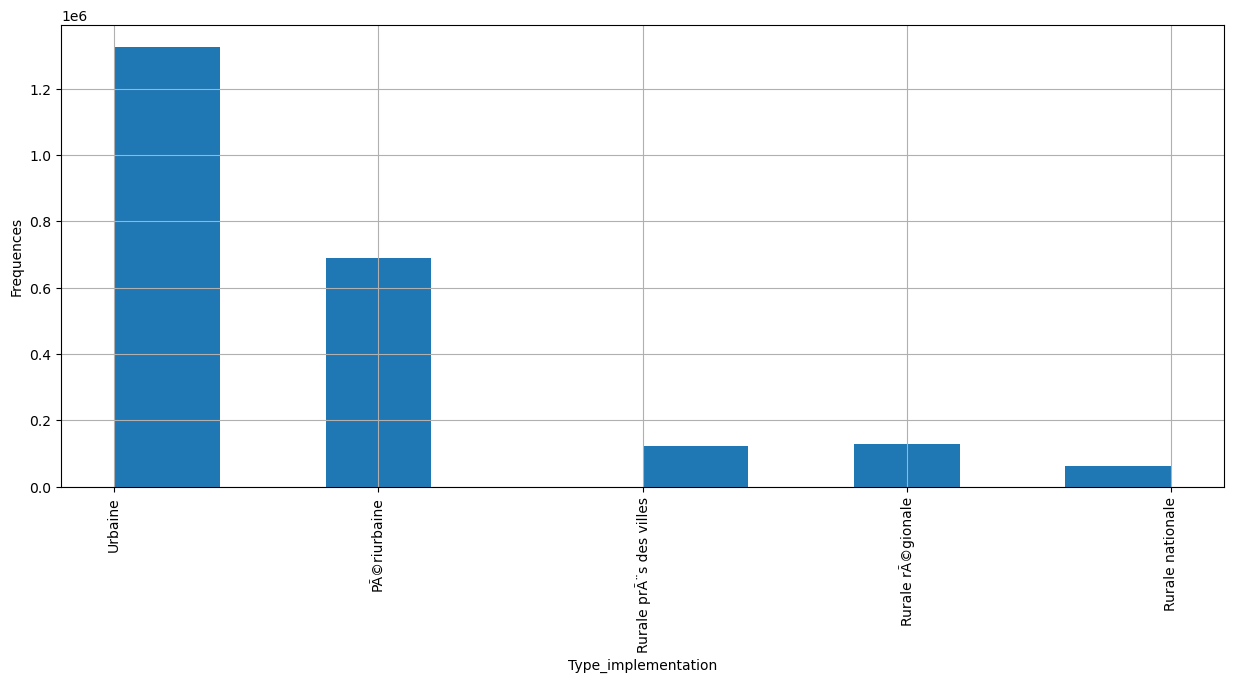

In [26]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type_implentation.hist()
plt.xlabel('Type_implementation')
plt.ylabel('Frequences')
plt.plot()

In [29]:
df['type_influence'].value_counts()

type_influence
Fond            1623713
Trafic           490910
Industrielle     215592
Name: count, dtype: int64

[]

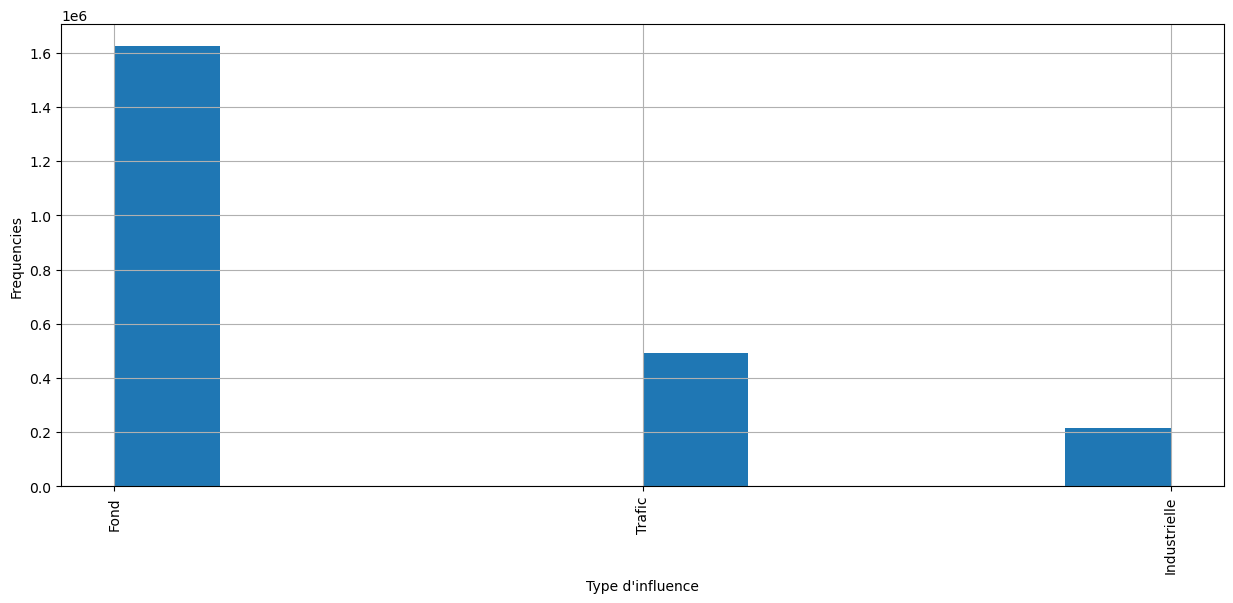

In [31]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type_influence.hist()
plt.xlabel('Type d\'influence')
plt.ylabel('Frequencies')
plt.plot()

In [33]:
# partie ML:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [34]:
nullvalues
# higher null values present in pm2_5 followed by spm

SO2                  2166138
PM2.5                1383922
O3                    753875
PM10                  499919
NO2                   387873
Zas                     6671
date_debut                 0
date_fin                   0
Organisme                  0
code_site                  0
nom_site                   0
type_implentation          0
type_influence             0
DATES                      0
dtype: int64

In [35]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [36]:
null_values_percentage

SO2                  92.958718
PM2.5                59.390314
O3                   32.352165
PM10                 21.453771
NO2                  16.645374
Zas                   0.286283
date_debut            0.000000
date_fin              0.000000
Organisme             0.000000
code_site             0.000000
nom_site              0.000000
type_implentation     0.000000
type_influence        0.000000
DATES                 0.000000
dtype: float64

In [38]:
df.drop(['Zas'],axis=1,inplace=True)
# suprimer la zone etant inutile

In [39]:
df.isnull().sum()
# Now checking the null values

date_debut                 0
date_fin                   0
Organisme                  0
code_site                  0
nom_site                   0
type_implentation          0
type_influence             0
NO2                   387873
O3                    753875
PM10                  499919
PM2.5                1383922
SO2                  2166138
DATES                      0
dtype: int64

In [40]:
df

,date_debut,date_fin,Organisme,code_site,nom_site,type_implentation,type_influence,NO2,O3,PM10,PM2.5,SO2,DATES
0,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR07004,Montferrand,Urbaine,Fond,6.1,47.8,6.7,6.1,NaN,2021-01-01
1,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR07009,Jardin Lecoq,Urbaine,Fond,7.5,46.8,5.2,NaN,NaN,2021-01-01
2,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR07034,Clermont-Esplanade Gare,Urbaine,Trafic,9.1,NaN,5.3,3.7,NaN,2021-01-01
3,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR07039,ChamaliÃ¨res Europe,Urbaine,Trafic,8.2,NaN,8.8,NaN,NaN,2021-01-01
4,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR07051,Beaulieu,PÃ©riurbaine,Industrielle,NaN,NaN,5.3,NaN,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330210,2020-12-30 07:00:00,2020-12-30 08:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR29423,ROANNE,Urbaine,Fond,35.3,22.3,4.0,NaN,NaN,2020-12-30
2330211,2020-12-30 07:00:00,2020-12-30 08:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR29424,SAINT ETIENNE SUD,Urbaine,Fond,30.9,32.0,4.1,2.8,NaN,2020-12-30
2330212,2020-12-30 07:00:00,2020-12-30 08:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR29426,SAINT-CHAMOND,Urbaine,Fond,34.1,31.5,4.2,2.3,NaN,2020-12-30
2330213,2020-12-30 07:00:00,2020-12-30 08:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR29441,ST ETIENNE BD URBAIN,Urbaine,Trafic,46.8,NaN,6.9,NaN,NaN,2020-12-30


In [41]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [42]:
df.isnull().sum()
# Now checking the null values

date_debut           0
date_fin             0
Organisme            0
code_site            0
nom_site             0
type_implentation    0
type_influence       0
NO2                  0
O3                   0
PM10                 0
PM2.5                0
SO2                  0
DATES                0
dtype: int64

In [43]:
df["PM10_24hr_avg"] = df.groupby("nom_site")["PM10"].rolling(window = 24, min_periods = 16).mean().values

In [46]:
df["PM2.5_24hr_avg"] = df.groupby("nom_site")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("nom_site")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NO2_24hr_avg"] = df.groupby("nom_site")["NO2"].rolling(window = 24, min_periods = 16).mean().values
df["O3_8hr_max"] = df.groupby("nom_site")["O3"].rolling(window = 8, min_periods = 1).max().values

In [47]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

In [48]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [49]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [50]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO2_SubIndex"] = df["NO2_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [51]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [52]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Bonne"
    elif x <= 100:
        return "Satisfasante"
    elif x <= 200:
        return "Modéré"
    elif x <= 300:
        return "médiocre"
    elif x <= 400:
        return "trés médicre"
    elif x > 400:
        return "Grave"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NO2_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex",
                                  "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

,date_debut,date_fin,Organisme,code_site,nom_site,type_implentation,type_influence,NO2,O3,PM10,...,NO2_24hr_avg,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
15,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR15053,Rocade Sud Eybens,Urbaine,Trafic,21.1,0.0,26.8,...,29.318750,0.0,19.687500,13.162500,0.0,36.648438,0.0,3,37.0,Bonne
16,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20013,A7 SUD LYONNAIS,PÃ©riurbaine,Trafic,7.0,0.0,17.7,...,27.594118,0.0,20.313725,12.388235,0.0,34.492647,0.0,3,34.0,Bonne
17,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20017,GERLAND,Urbaine,Fond,7.6,48.7,4.8,...,26.061111,0.0,20.111111,11.700000,0.0,32.576389,0.0,3,33.0,Bonne
18,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20019,GRANDCLEMENT,Urbaine,Trafic,9.7,0.0,9.9,...,24.689474,0.0,19.973684,11.084211,0.0,30.861842,0.0,3,31.0,Bonne
19,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20029,FEYZIN STADE,PÃ©riurbaine,Industrielle,0.0,0.0,4.9,...,23.455000,0.0,19.541667,10.530000,0.0,29.318750,0.0,3,29.0,Bonne
20,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20031,ST FONS CENTRE,PÃ©riurbaine,Industrielle,23.1,0.0,7.1,...,22.338095,0.0,19.753968,10.028571,0.0,27.922619,0.0,3,28.0,Bonne
21,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20037,TERNAY,PÃ©riurbaine,Fond,6.0,42.7,7.3,...,21.322727,0.0,19.787879,9.572727,0.0,26.653409,0.0,3,27.0,Bonne
22,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20046,VAULX EN VELIN,Urbaine,Fond,10.6,33.9,9.8,...,20.395652,0.0,20.036232,9.156522,0.0,25.494565,0.0,3,25.0,Bonne
23,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20047,COTIERE AIN,PÃ©riurbaine,Fond,4.0,53.0,2.6,...,19.545833,0.0,19.819444,8.775000,0.0,24.432292,0.0,3,24.0,Bonne
24,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20048,SAINT EXUPERY,PÃ©riurbaine,Fond,6.7,0.0,8.3,...,18.025000,0.0,20.868056,8.100000,0.0,22.531250,0.0,3,23.0,Bonne


In [53]:
df[~df.AQI_calculated.isna()].head(100)

,date_debut,date_fin,Organisme,code_site,nom_site,type_implentation,type_influence,NO2,O3,PM10,...,NO2_24hr_avg,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
15,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR15053,Rocade Sud Eybens,Urbaine,Trafic,21.1,0.0,26.8,...,29.318750,0.0,19.687500,13.162500,0.0,36.648438,0.0,3,37.0,Bonne
16,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20013,A7 SUD LYONNAIS,PÃ©riurbaine,Trafic,7.0,0.0,17.7,...,27.594118,0.0,20.313725,12.388235,0.0,34.492647,0.0,3,34.0,Bonne
17,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20017,GERLAND,Urbaine,Fond,7.6,48.7,4.8,...,26.061111,0.0,20.111111,11.700000,0.0,32.576389,0.0,3,33.0,Bonne
18,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20019,GRANDCLEMENT,Urbaine,Trafic,9.7,0.0,9.9,...,24.689474,0.0,19.973684,11.084211,0.0,30.861842,0.0,3,31.0,Bonne
19,2021-01-01 00:00:00,2021-01-01 01:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR20029,FEYZIN STADE,PÃ©riurbaine,Industrielle,0.0,0.0,4.9,...,23.455000,0.0,19.541667,10.530000,0.0,29.318750,0.0,3,29.0,Bonne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2021-01-01 05:00:00,2021-01-01 06:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR07061,Riom PÃ©riurbaine,PÃ©riurbaine,Fond,3.1,47.7,4.5,...,3.558333,0.0,12.048611,1.558333,0.0,4.447917,0.0,3,12.0,Bonne
393,2021-01-01 05:00:00,2021-01-01 06:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR15013,Champ sur Drac,PÃ©riurbaine,Fond,14.4,19.2,0.0,...,3.558333,0.0,12.076389,1.558333,0.0,4.447917,0.0,3,12.0,Bonne
394,2021-01-01 05:00:00,2021-01-01 06:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR15018,Voiron Urbain,Urbaine,Fond,7.8,38.8,1.9,...,3.558333,0.0,12.666667,1.558333,0.0,4.447917,0.0,3,13.0,Bonne
395,2021-01-01 05:00:00,2021-01-01 06:00:00,ATMO AUVERGNE-RHÃNE-ALPES,FR15038,St Martin d'Heres,Urbaine,Fond,10.3,28.3,9.1,...,2.270833,0.0,12.118056,0.941667,0.0,2.838542,0.0,3,12.0,Bonne


In [54]:
df['AQI_bucket_calculated'].value_counts()
# Viewing the count of values present in the type column

AQI_bucket_calculated
Satisfasante    790960
Bonne           488103
Modéré          138476
médiocre           473
trés médicre         8
Name: count, dtype: int64

In [56]:
df.columns

Index(['date_debut', 'date_fin', 'Organisme', 'code_site', 'nom_site',
       'type_implentation', 'type_influence', 'NO2', 'O3', 'PM10', 'PM2.5',
       'SO2', 'DATES', 'PM10_24hr_avg', 'PM2.5_24hr_avg', 'SO2_24hr_avg',
       'NO2_24hr_avg', 'O3_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NO2_SubIndex', 'O3_SubIndex', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [57]:
df.shape

(2330215, 26)

In [58]:
df.isnull().sum()

date_debut                    0
date_fin                      0
Organisme                     0
code_site                     0
nom_site                      0
type_implentation             0
type_influence                0
NO2                           0
O3                            0
PM10                          0
PM2.5                         0
SO2                           0
DATES                         0
PM10_24hr_avg              1262
PM2.5_24hr_avg             1262
SO2_24hr_avg               1262
NO2_24hr_avg               1262
O3_8hr_max                    0
PM2.5_SubIndex                0
PM10_SubIndex                 0
SO2_SubIndex                  0
NO2_SubIndex                  0
O3_SubIndex                   0
Checks                        0
AQI_calculated           912195
AQI_bucket_calculated    912195
dtype: int64

In [61]:
# Suppression des lignes contenant des valeurs manquantes
df_ML = df.dropna()

In [62]:
df_ML.shape

(1418020, 26)

In [63]:
df_ML.isnull().sum()

date_debut               0
date_fin                 0
Organisme                0
code_site                0
nom_site                 0
type_implentation        0
type_influence           0
NO2                      0
O3                       0
PM10                     0
PM2.5                    0
SO2                      0
DATES                    0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NO2_24hr_avg             0
O3_8hr_max               0
PM2.5_SubIndex           0
PM10_SubIndex            0
SO2_SubIndex             0
NO2_SubIndex             0
O3_SubIndex              0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

In [64]:
df_ML['AQI_bucket_calculated'].value_counts()

AQI_bucket_calculated
Satisfasante    790960
Bonne           488103
Modéré          138476
médiocre           473
trés médicre         8
Name: count, dtype: int64

In [65]:
df_ML['DATES'].value_counts()

DATES
2021-10-31    1848
2022-01-08    1848
2022-03-05    1848
2022-02-18    1848
2022-02-15    1848
              ... 
2018-03-14       1
2018-03-02       1
2018-02-28       1
2018-02-21       1
2018-06-24       1
Name: count, Length: 1795, dtype: int64

In [66]:
X=df_ML[['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NO2_SubIndex','O3_SubIndex']]
Y=df_ML['AQI_calculated']
X.head()
# we only select columns like soi, noi, rpi, spmi

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex
15,19.687500,13.162500,0.0,36.648438,0.0
16,20.313725,12.388235,0.0,34.492647,0.0
17,20.111111,11.700000,0.0,32.576389,0.0
18,19.973684,11.084211,0.0,30.861842,0.0
19,19.541667,10.530000,0.0,29.318750,0.0


In [67]:
Y.head()

15    37.0
16    34.0
17    33.0
18    31.0
19    29.0
Name: AQI_calculated, dtype: float64

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(1134416, 5) (283604, 5) (1134416,) (283604,)


In [69]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [70]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [73]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  8.746266645436126
RMSE TestData =  8.742194303825752
--------------------------------------------------
RSquared value on train: 0.9092745748641808
RSquared value on test: 0.908776314245932


In [74]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 3.380584028700625
Coefficients: [0.17412234 0.14683736 0.12743755 0.44448204 0.85077346]


In [75]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [76]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [77]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.0
RMSE TestData =  0.256589714422675
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.999921413998482


In [78]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [79]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [81]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.06859681299854811
RMSE TestData =  0.22169982737521984
--------------------------------------------------
RSquared value on train: 0.9999944192642003
RSquared value on test: 0.9999413325225044


In [89]:
# prédiction par date
df_ML['DATES'] = pd.to_datetime(df_ML['DATES'])  # Ensure the date column is in datetime format
df_ML_DATES= df_ML.sort_values('DATES')  # Sort by date

In [90]:
split_date = '2024-01-01'
train_df_dates = df_ML_DATES[df_ML_DATES['DATES'] <= split_date]
test_df_dates = df_ML_DATES[df_ML_DATES['DATES'] > split_date]

In [91]:
train_df_dates.shape

(1257977, 26)

In [92]:
test_df_dates.shape

(160043, 26)

In [94]:
XX=train_df_dates[['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NO2_SubIndex','O3_SubIndex']]
YY=train_df_dates['AQI_calculated']

In [95]:
XX.head()

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex
2224410,17.326389,18.070833,0.0,7.973958,0.0
2224411,16.826389,17.850000,0.0,7.916667,0.0
2224412,16.368056,17.616667,0.0,7.718750,0.0
2224413,16.041667,17.458333,0.0,7.625000,0.0
2224414,15.770833,17.450000,0.0,7.625000,0.0


In [96]:
xx=test_df_dates[['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NO2_SubIndex','O3_SubIndex']]
yy=test_df_dates['AQI_calculated']

In [97]:
xx.head()

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex
2024782,6.180556,5.062500,-3.171875,11.432292,51.0
2024781,5.673611,4.495833,-3.192708,9.255208,51.0
2024780,5.618056,4.254167,-3.166667,8.166667,51.0
2024779,5.375000,4.033333,-3.171875,7.666667,51.0
2024778,5.194444,3.937500,-3.156250,7.296875,51.0


In [100]:
yy.head()

2024782    51.0
2024781    51.0
2024780    51.0
2024779    51.0
2024778    51.0
Name: AQI_calculated, dtype: float64

In [98]:
model = LinearRegression()
model.fit(XX, YY)

LinearRegression()

In [102]:
Y_pred = model.predict(xx)

# Calculate the mean squared error
mse = mean_squared_error(yy, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the coefficient of determination (R^2)
r2 = r2_score(yy, Y_pred)
print(f"R^2 Score: {r2}")

# Optionally, print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 73.86021822393184
R^2 Score: 0.9221892406012723
Intercept: 3.512016733344808
Coefficients: [0.18167467 0.13987577 0.10118611 0.46226275 0.84764376]
